In [66]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
nls97 = pd.read_csv("data/nls97.csv")
covidtotals = pd.read_csv("data/covidtotals.csv",
  parse_dates=['lastdate'])

(210, 12)

In [9]:
nls97.head()

,personid,gender,birthmonth,birthyear,highestgradecompleted,maritalstatus,childathome,childnotathome,wageincome,weeklyhrscomputer,...,colenrfeb13,colenroct13,colenrfeb14,colenroct14,colenrfeb15,colenroct15,colenrfeb16,colenroct16,colenrfeb17,colenroct17
0,100061,Female,5,1980,13.0,Married,4.0,0.0,12500.0,10 hours or more a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
1,100139,Male,9,1983,12.0,Married,2.0,0.0,120000.0,1 to 3 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
2,100284,Male,11,1984,7.0,Never-married,1.0,0.0,58000.0,None,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
3,100292,Male,4,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,NaN,NaN,NaN,NaN
4,100583,Male,1,1980,13.0,Married,4.0,0.0,30000.0,Less than 1 hour a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled


In [10]:
nls97.shape

(8984, 89)

In [11]:
# 다수의 컬럼 정보도 info()를 통해 확인
nls97.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8984 entries, 0 to 8983
Data columns (total 89 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   personid               8984 non-null   int64  
 1   gender                 8984 non-null   object 
 2   birthmonth             8984 non-null   int64  
 3   birthyear              8984 non-null   int64  
 4   highestgradecompleted  6663 non-null   float64
 5   maritalstatus          6672 non-null   object 
 6   childathome            4791 non-null   float64
 7   childnotathome         4791 non-null   float64
 8   wageincome             5091 non-null   float64
 9   weeklyhrscomputer      6710 non-null   object 
 10  weeklyhrstv            6711 non-null   object 
 11  nightlyhrssleep        6706 non-null   float64
 12  satverbal              1406 non-null   float64
 13  satmath                1407 non-null   float64
 14  gpaoverall             6004 non-null   float64
 15  gpae

#### highestgradecompleted

In [55]:
nls97['highestgradecompleted'].value_counts()

12.0    1389
16.0    1016
14.0     750
13.0     538
18.0     407
15.0     397
17.0     388
11.0     364
20.0     333
10.0     329
9.0      292
19.0     203
8.0      198
7.0       31
6.0       16
95.0      11
5.0        1
Name: highestgradecompleted, dtype: int64

<table class="sticky-enabled">
 <thead><tr><th>Value</th><th>Value Meaning</th><th>Description</th><th>Display Order</th> </tr></thead>
<tbody>
 <tr class="odd"><td>No Formal Schooling</td><td>Never attended / kindergarten only</td><td>Indicates that a person never attended school or only attended kindergarten.</td><td>0</td> </tr>
 <tr class="even"><td>1st Grade</td><td>1st Grade</td><td>Indicates that 1st grade is the highest level of educational achievement.</td><td>1</td> </tr>
 <tr class="odd"><td>2nd Grade</td><td>2nd Grade</td><td>Indicates that 2nd grade is the highest level of educational achievement.</td><td>2</td> </tr>
 <tr class="even"><td>3rd Grade</td><td>3rd Grade</td><td>Indicates that 3rd grade is the highest level of educational achievement.</td><td>3</td> </tr>
 <tr class="odd"><td>4th Grade</td><td>4th Grade</td><td>Indicates that 4th grade is the highest level of educational achievement.</td><td>4</td> </tr>
 <tr class="even"><td>5th Grade</td><td>5th Grade</td><td>Indicates that 5th grade is the highest level of educational achievement.</td><td>5</td> </tr>
 <tr class="odd"><td>6th Grade</td><td>6th Grade</td><td>Indicates that 6th grade is the highest level of educational achievement.</td><td>6</td> </tr>
 <tr class="even"><td>7th Grade</td><td>7th Grade</td><td>Indicates that 7th grade is the highest level of educational achievement</td><td>7</td> </tr>
 <tr class="odd"><td>8th Grade</td><td>8th Grade</td><td>Indicates that 8th grade is the highest level of educational achievement</td><td>8</td> </tr>
 <tr class="even"><td>9th Grade</td><td>9th Grade</td><td>Indicates that 9th grade is the highest level of educational achievement</td><td>9</td> </tr>
 <tr class="odd"><td>10th Grade</td><td>10th Grade</td><td>Indicates that 10th grade is the highest level of educational achievement</td><td>10</td> </tr>
 <tr class="even"><td>11th Grade</td><td>11th Grade</td><td>Indicates that 11th grade is the highest level of educational achievement</td><td>11</td> </tr>
 <tr class="odd"><td>12th Grade No Diploma</td><td>12th Grade</td><td>Indicates that a person was in school through 12th grade but that they did not receive a high school diploma.</td><td>12</td> </tr>
 <tr class="even"><td>High School Graduate</td><td>High School Graduate</td><td>Indicates that a person has attended high school and has received a high school diploma.</td><td>13</td> </tr>
 <tr class="odd"><td>General Equivalency Diploma</td><td>GED or equivalent</td><td>Indicates that a person has received a General Equivalency Diploma in lieu of a high school diploma.</td><td>14</td> </tr>
 <tr class="even"><td>Some College, No Degree</td><td>Some College</td><td>Indicates that a person has attended college but that they did not receive any degree.</td><td>15</td> </tr>
 <tr class="odd"><td>VoTech Program</td><td>Associate&#039;s degree: occupational, technical or vocational program</td><td>Indicates that a person has received a degree from a occupational, technical, or vocational program.</td><td>16</td> </tr>
 <tr class="even"><td>Associate Degree</td><td>Associate&#039;s degree: academic program</td><td>Indicates that a person has received a degree from a 2 year college program.</td><td>17</td> </tr>
 <tr class="odd"><td>Bachelor Degree</td><td>Bachelor&#039;s degree</td><td>Indicates that a person has received a degree for successful completion of a program of studies that normally requires at least 4-5 years of full-time equivalent college-level work.</td><td>18</td> </tr>
 <tr class="even"><td>Master&#039;s Degree</td><td>Master&#039;s Degree Completion</td><td>Indicates that a person has received a degree for completion of at least one year of prescribed study beyond the bachelor&#039;s degree.</td><td>19</td> </tr>
 <tr class="odd"><td>Professional Doctorate Degree</td><td>Professional school degree</td><td>Indicates that a person has received a degree allowing them to practice a profession, such as law, medicine, music, or ministry.</td><td>20</td> </tr>
 <tr class="even"><td>Academic Doctorate Degree</td><td>Doctoral degree</td><td>Indicates that a person has received a degree the highest award earned for graduate study.</td><td>21</td> </tr>
 <tr class="odd"><td>Refused</td><td>Refuse</td><td>To decline to do, accept, give, or allow something.</td><td>22</td> </tr>
 <tr class="even"><td>Don&#039;t Know</td><td>Does Not Know</td><td>The answer is not known by the person answering.</td><td>23</td> </tr>
</tbody>
</table>

In [57]:
nls97.head(1)

,gender,birthmonth,birthyear,highestgradecompleted,maritalstatus,childathome,childnotathome,wageincome,weeklyhrscomputer,weeklyhrstv,...,colenrfeb13,colenroct13,colenrfeb14,colenroct14,colenrfeb15,colenroct15,colenrfeb16,colenroct16,colenrfeb17,colenroct17
personid,,,,,,,,,,,,,,,,,,,,,
100061,Female,5,1980,13.0,Married,4.0,0.0,12500.0,10 hours or more a week,11 to 20 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled


In [59]:
nls97['birthyear'].value_counts()

1981    1874
1982    1841
1983    1807
1984    1771
1980    1691
Name: birthyear, dtype: int64

In [60]:
nls97['maritalstatus'].value_counts()

Married          3066
Never-married    2766
Divorced          663
Separated         154
Widowed            23
Name: maritalstatus, dtype: int64

In [62]:
nls97['childathome'].value_counts()

2.0    1542
1.0    1272
3.0     853
0.0     672
4.0     320
5.0      92
6.0      31
7.0       6
8.0       2
9.0       1
Name: childathome, dtype: int64

In [63]:
nls97['childnotathome'].value_counts()

0.0     3711
1.0      575
2.0      292
3.0      119
4.0       53
5.0       25
6.0        8
7.0        4
8.0        3
12.0       1
Name: childnotathome, dtype: int64

In [64]:
nls97['wageincome'].value_counts()

40000.0     225
50000.0     216
30000.0     204
25000.0     189
35000.0     156
           ... 
11200.0       1
74674.0       1
63582.0       1
100500.0      1
93580.0       1
Name: wageincome, Length: 364, dtype: int64

<AxesSubplot:xlabel='wageincome', ylabel='Count'>

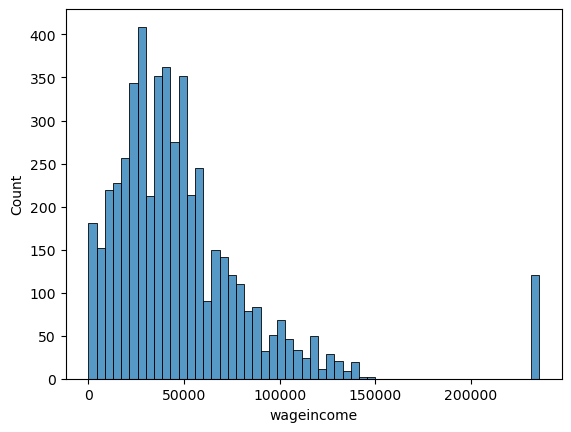

In [67]:
sns.histplot(nls97['wageincome'])

<AxesSubplot:xlabel='wageincome', ylabel='Count'>

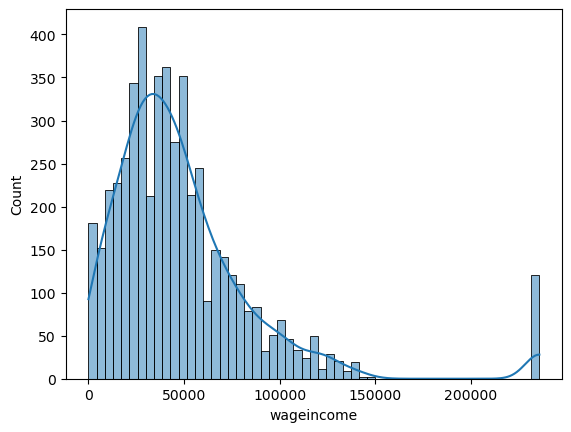

In [74]:
sns.histplot(data=nls97['wageincome'], kde=True)

<AxesSubplot:xlabel='wageincome', ylabel='Count'>

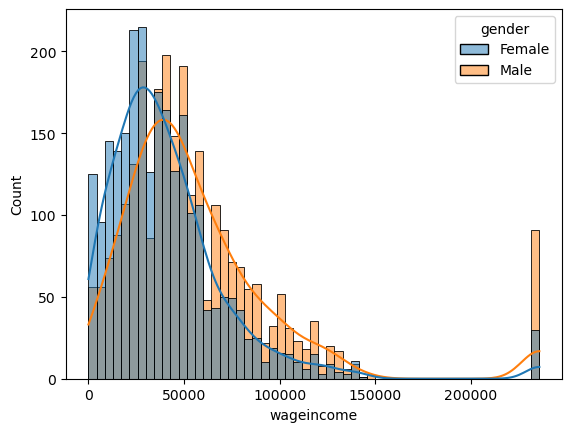

In [78]:
sns.histplot(data=nls97, x='wageincome', hue="gender", kde=True)

### 행 인덱스 설정

In [15]:
nls97['personid']

0       100061
1       100139
2       100284
3       100292
4       100583
         ...  
8979    999291
8980    999406
8981    999543
8982    999698
8983    999963
Name: personid, Length: 8984, dtype: int64

In [25]:
s1 = pd.Series([1,2,3,4])
s2 = pd.Series([1,2,3,4])
s1.compare(s2)

,self,other


In [26]:
s1 = pd.Series([1,2,3,4])
s2 = pd.Series([4,3,2,1])
s1.compare(s2)

,self,other
0,1,4
1,2,3
2,3,2
3,4,1


In [32]:
s2.sort_values()

3    1
2    2
1    3
0    4
dtype: int64

In [35]:
# 인덱스가 일치하지 않아 에러
#s1.compare(s2.sort_values())

In [37]:
s2.values

array([4, 3, 2, 1], dtype=int64)

In [45]:
type(s2.values)

numpy.ndarray

In [42]:
s2.sort_values().values

array([1, 2, 3, 4], dtype=int64)

In [46]:
np.array_equal(s1.values, s2.sort_values().values)

True

In [21]:
nls97['personid'].sort_values()

0       100061
1       100139
2       100284
3       100292
4       100583
         ...  
8979    999291
8980    999406
8981    999543
8982    999698
8983    999963
Name: personid, Length: 8984, dtype: int64

In [47]:
np.array_equal(nls97['personid'].values, nls97['personid'].sort_values().values)

True

In [48]:
nls97.set_index('personid',inplace=True)
nls97.head()

,gender,birthmonth,birthyear,highestgradecompleted,maritalstatus,childathome,childnotathome,wageincome,weeklyhrscomputer,weeklyhrstv,...,colenrfeb13,colenroct13,colenrfeb14,colenroct14,colenrfeb15,colenroct15,colenrfeb16,colenroct16,colenrfeb17,colenroct17
personid,,,,,,,,,,,,,,,,,,,,,
100061,Female,5,1980,13.0,Married,4.0,0.0,12500.0,10 hours or more a week,11 to 20 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
100139,Male,9,1983,12.0,Married,2.0,0.0,120000.0,1 to 3 hours a week,3 to 10 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
100284,Male,11,1984,7.0,Never-married,1.0,0.0,58000.0,None,11 to 20 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
100292,Male,4,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,NaN,NaN,NaN,NaN
100583,Male,1,1980,13.0,Married,4.0,0.0,30000.0,Less than 1 hour a week,3 to 10 hours a week,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled


In [6]:
covidtotals.head()

,iso_code,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
0,AFG,2020-06-01,Afghanistan,15205,257,390.589,6.602,38928341.0,54.422,18.6,1803.987,0.50
1,ALB,2020-06-01,Albania,1137,33,395.093,11.467,2877800.0,104.871,38.0,11803.431,2.89
2,DZA,2020-06-01,Algeria,9394,653,214.225,14.891,43851043.0,17.348,29.1,13913.839,1.90
3,AND,2020-06-01,Andorra,764,51,9888.048,660.066,77265.0,163.755,NaN,NaN,NaN
4,AGO,2020-06-01,Angola,86,4,2.617,0.122,32866268.0,23.890,16.8,5819.495,NaN


In [7]:
covidtotals.shape

(210, 12)

In [8]:
covidtotals.dtypes

iso_code                   object
lastdate           datetime64[ns]
location                   object
total_cases                 int64
total_deaths                int64
total_cases_pm            float64
total_deaths_pm           float64
population                float64
pop_density               float64
median_age                float64
gdp_per_capita            float64
hosp_beds                 float64
dtype: object

In [49]:
covidtotals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   iso_code         210 non-null    object        
 1   lastdate         210 non-null    datetime64[ns]
 2   location         210 non-null    object        
 3   total_cases      210 non-null    int64         
 4   total_deaths     210 non-null    int64         
 5   total_cases_pm   209 non-null    float64       
 6   total_deaths_pm  209 non-null    float64       
 7   population       210 non-null    float64       
 8   pop_density      198 non-null    float64       
 9   median_age       186 non-null    float64       
 10  gdp_per_capita   182 non-null    float64       
 11  hosp_beds        164 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 19.8+ KB


In [50]:
covidtotals['iso_code'].value_counts()

AFG    1
RUS    1
MMR    1
NAM    1
NPL    1
      ..
DEU    1
GHA    1
GIB    1
GRC    1
ZWE    1
Name: iso_code, Length: 210, dtype: int64

In [ ]:
covidtotals

In [51]:
covidtotals['lastdate'].value_counts()

2020-06-01    208
2020-05-26      1
2020-05-31      1
Name: lastdate, dtype: int64

In [52]:
covidtotals['location'].value_counts()

Afghanistan    1
Russia         1
Myanmar        1
Namibia        1
Nepal          1
              ..
Germany        1
Ghana          1
Gibraltar      1
Greece         1
Zimbabwe       1
Name: location, Length: 210, dtype: int64